In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import orjsonl
import numpy as np

In [56]:
all_values = []
datas = []

names = [
    "Beam Search",
    "cg-MCTS (exp 0.5)",
    "cg-MCTS (exp 1.0)",
    "cg-MCTS (exp 2.0)",
    "cg-MCTS (exp 3.0)",
    "Nucleus Sampling",
    "Diverse beam",
    "rw-MCTS (exp 0.5)",
    "rw-MCTS (exp 1.0)",
    "rw-MCTS (exp 2.0)",
    "rw-MCTS (exp 3.0)",
    "Stochastic beam",
]
model_order = [
    "Nucleus Sampling",
    "Beam Search",
    "Diverse beam",
    "Stochastic beam",
    # "cg-MCTS (exp 0.5)",
    "cg-MCTS (exp 1.0)",
    # "cg-MCTS (exp 2.0)",
    "cg-MCTS (exp 3.0)",
    # "rw-MCTS (exp 0.5)",
    "rw-MCTS (exp 1.0)",
    # "rw-MCTS (exp 2.0)",
    "rw-MCTS (exp 3.0)",
]
for name, data in zip(names, orjsonl.load("../../../output/tgts-aicorrupt.jsonl", "rb")):
    print(len(data))
    datas.extend((name, d) for d in data)
    all_values.extend(data)

all_values = np.array(all_values)
df = pd.DataFrame(datas, columns=["model", "ai_corrupt"])
print(df)
print(df["ai_corrupt"].min(), df["ai_corrupt"].max())

1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1045
                 model  ai_corrupt
0          Beam Search    0.833825
1          Beam Search    0.979778
2          Beam Search    0.647083
3          Beam Search    0.988090
4          Beam Search    0.987789
...                ...         ...
12304  Stochastic beam    0.996507
12305  Stochastic beam    0.992595
12306  Stochastic beam    0.991454
12307  Stochastic beam    0.995250
12308  Stochastic beam    0.995404

[12309 rows x 2 columns]
0.00041419267654418945 0.9995066579431295


In [57]:
min = df["ai_corrupt"].min()
max = df["ai_corrupt"].max()
std = df["ai_corrupt"].std()
mean = df["ai_corrupt"].mean()

# df["ai_corrupt"] = (df["ai_corrupt"] - mean) / std
print(min, max, std, mean)

0.00041419267654418945 0.9995066579431295 0.28404398983654044 0.8705256975139803


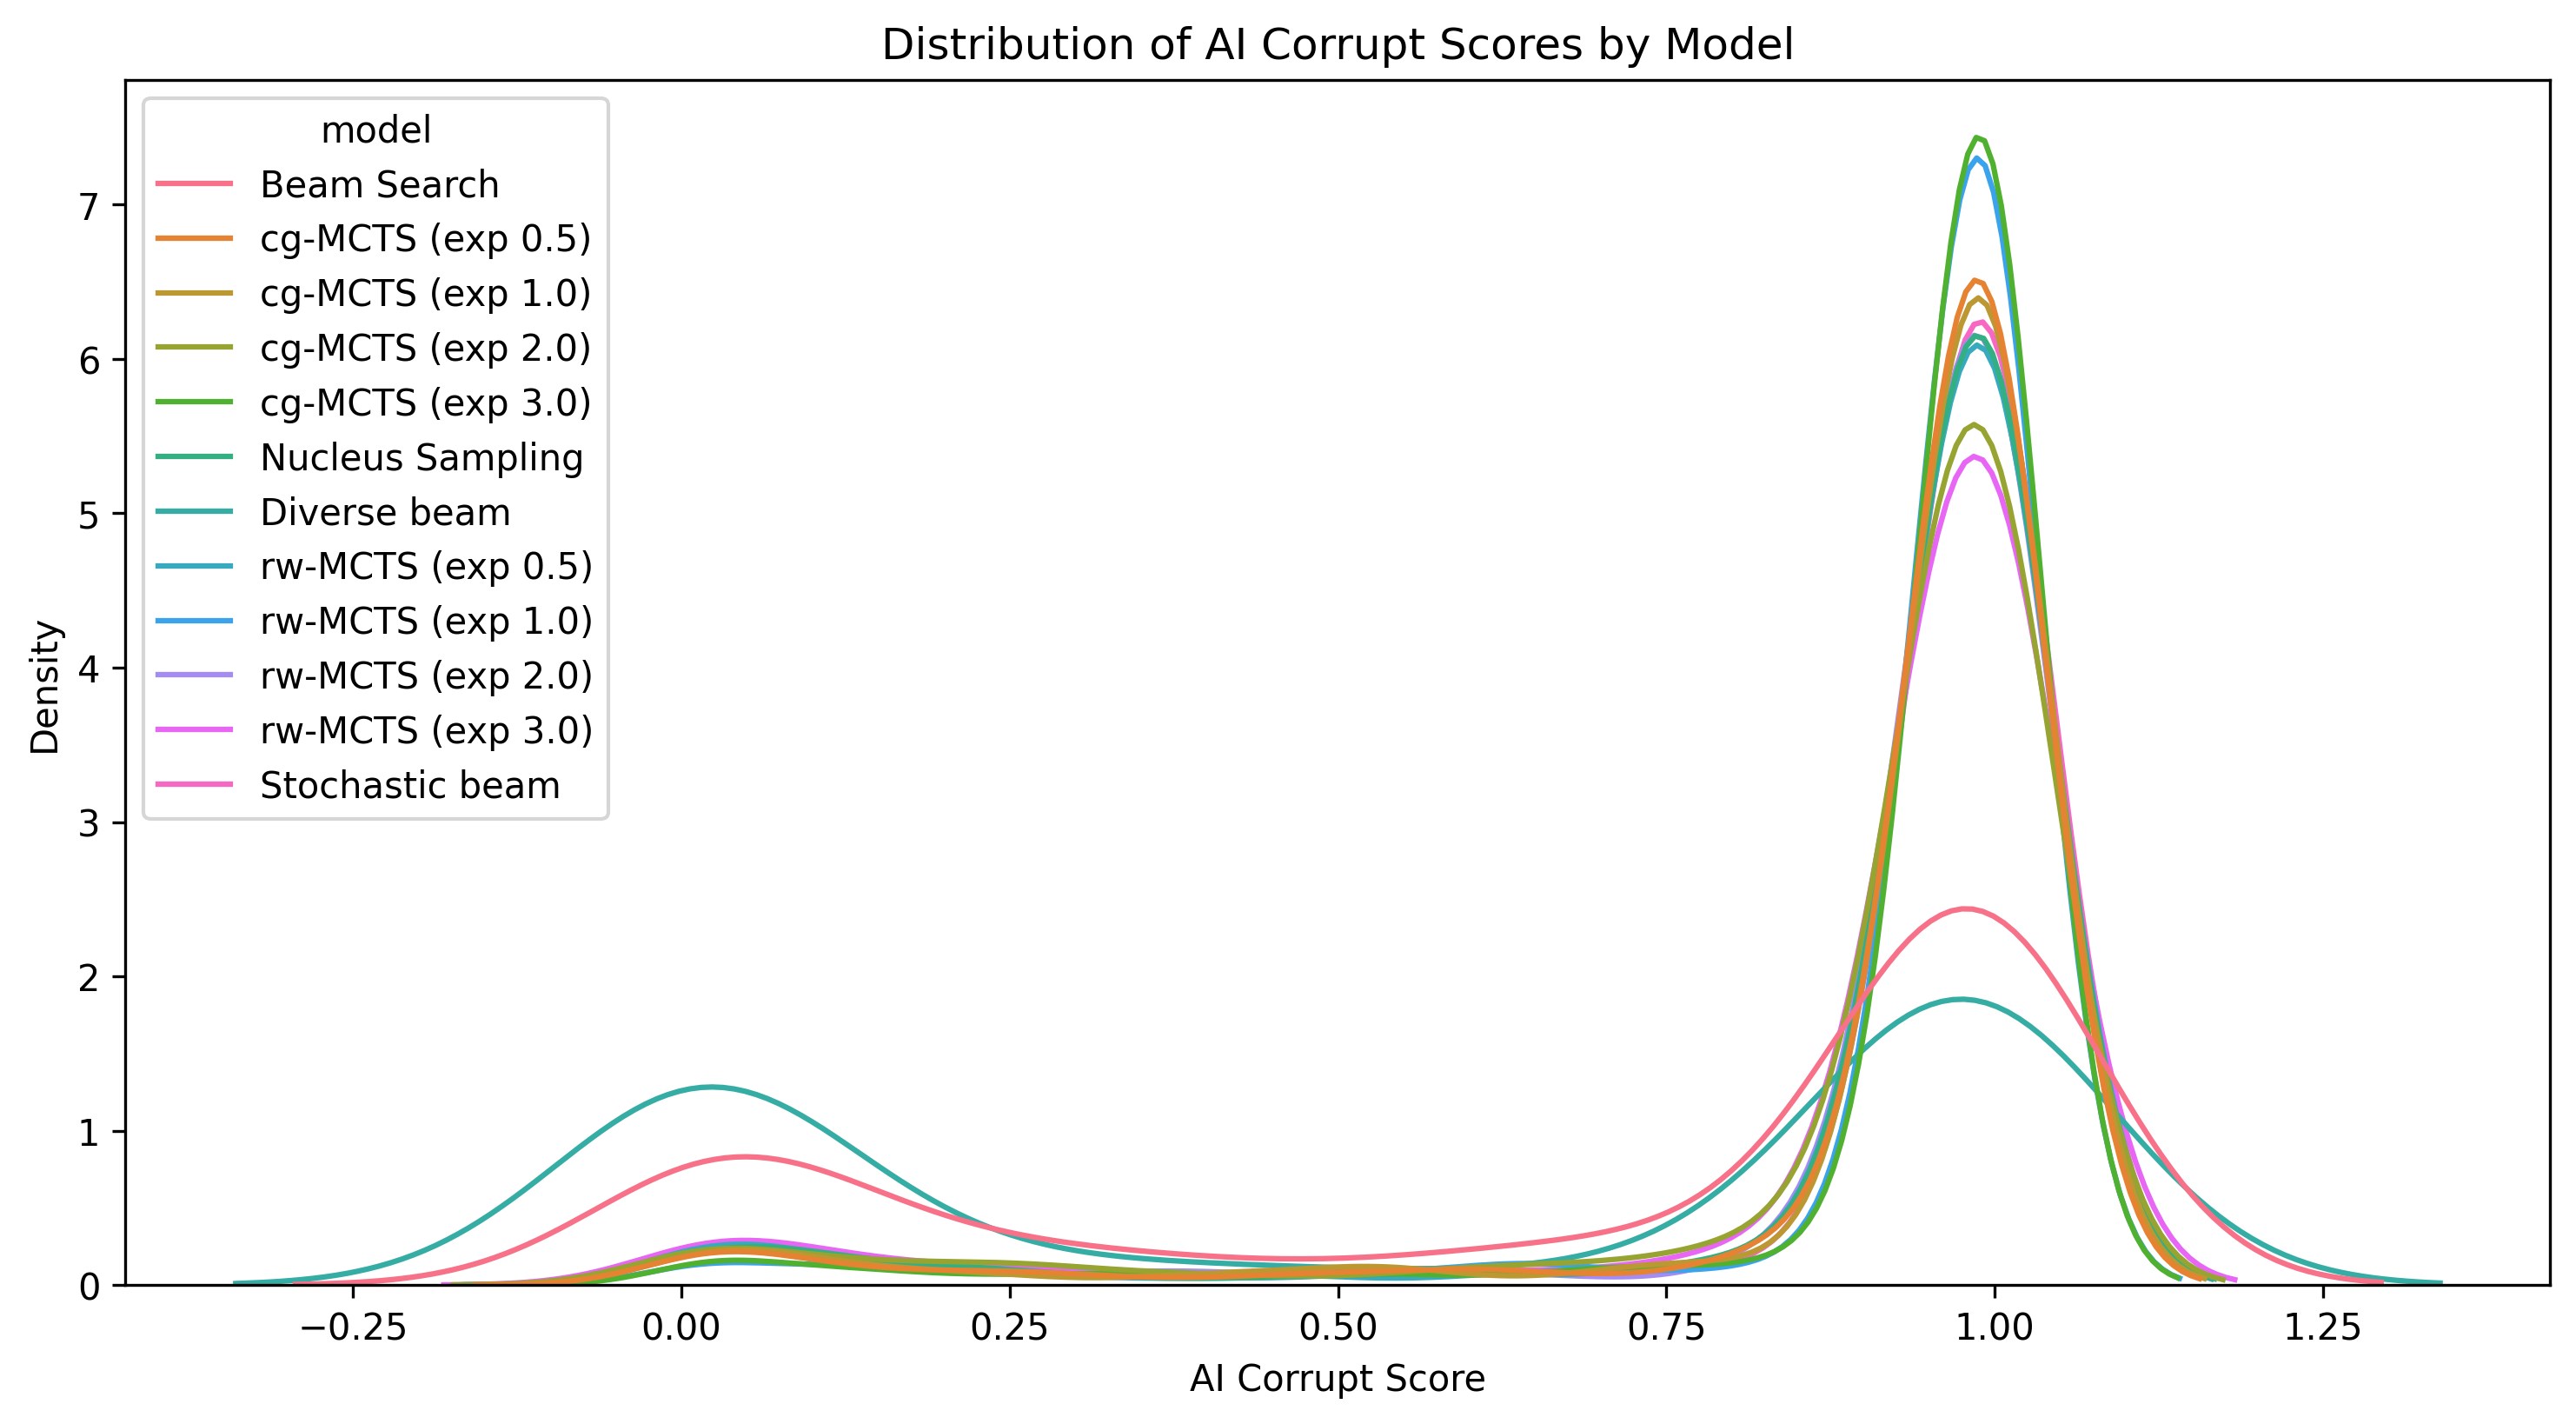

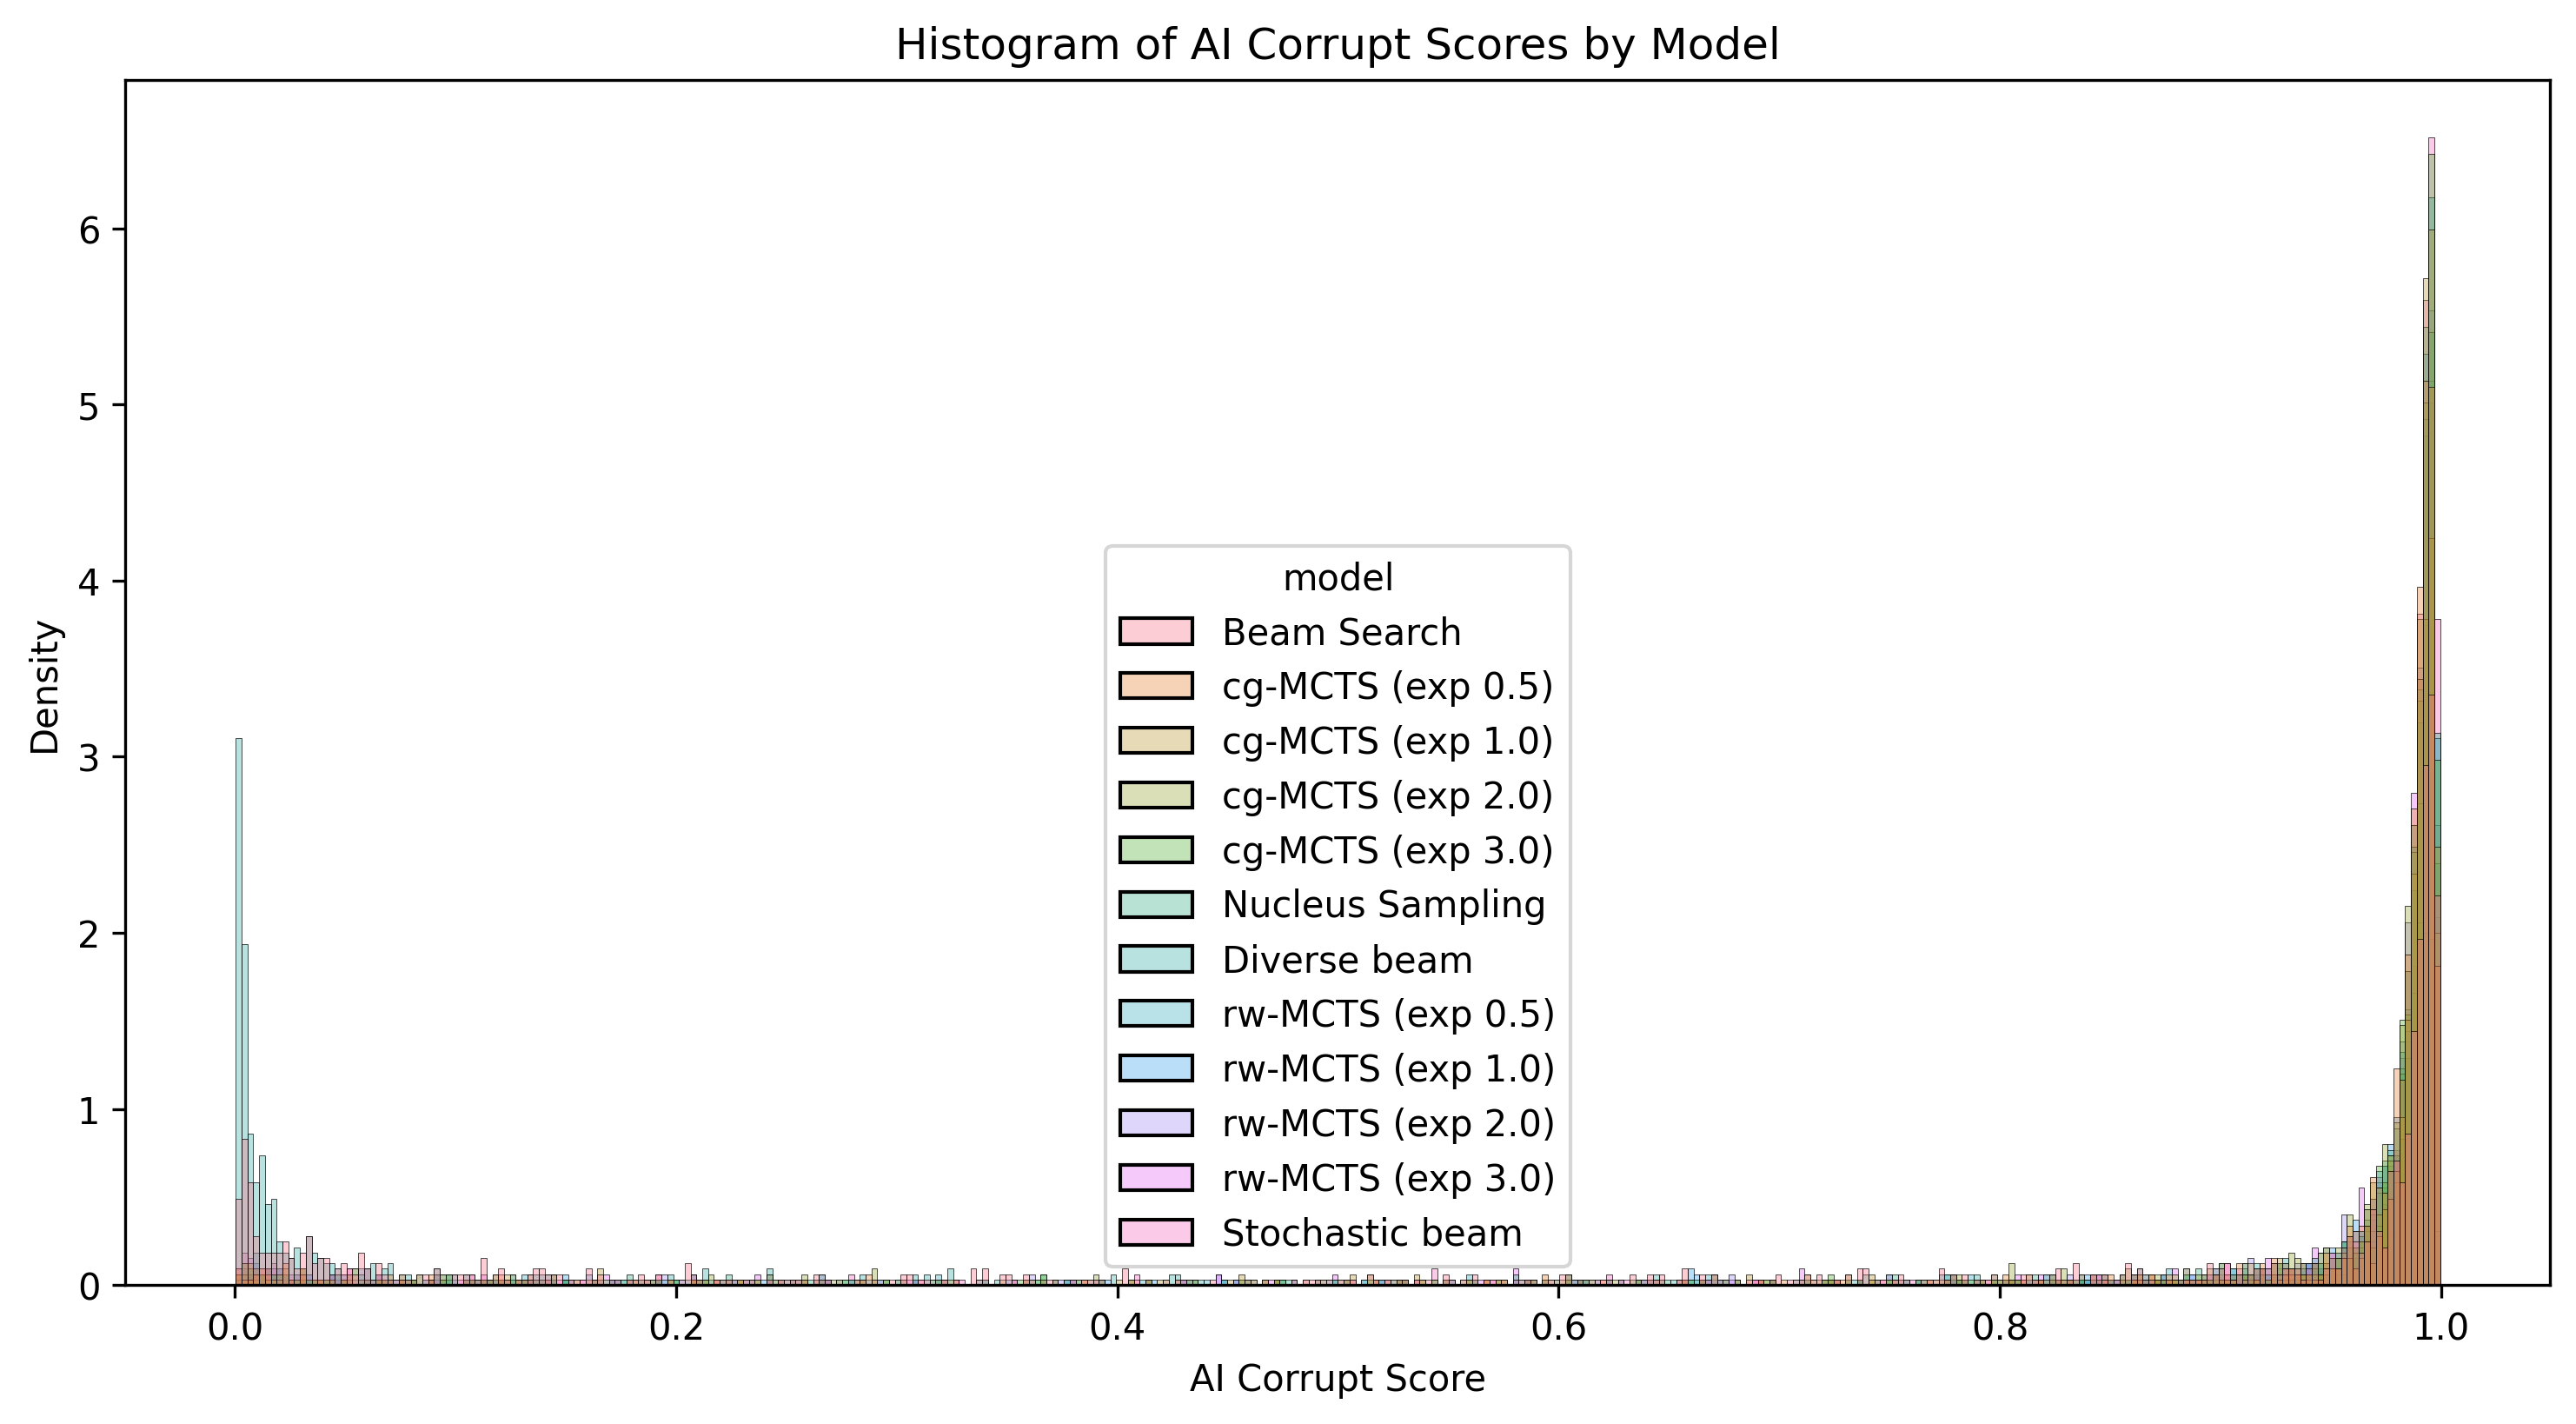

In [58]:
import seaborn as sns

# Seaborn distribution plot
plt.figure(figsize=(12, 6), dpi=300)
sns.kdeplot(data=df, x="ai_corrupt", hue="model", common_norm=False)
plt.title("Distribution of AI Corrupt Scores by Model")
plt.xlabel("AI Corrupt Score")
plt.ylabel("Density")

# Alternative: Histogram
plt.figure(figsize=(12, 6), dpi=300)
sns.histplot(data=df, x="ai_corrupt", hue="model", stat="density", alpha=0.35)
plt.title("Histogram of AI Corrupt Scores by Model")
plt.xlabel("AI Corrupt Score")
plt.ylabel("Density")

plt.show()

In [59]:
y_scale = 1.0
box_scale = 0.7

C:\Users\apoll\AppData\Local\Temp\ipykernel_115292\175405858.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantiles = df_sorted.groupby("model")["ai_corrupt"].quantile(
C:\Users\apoll\AppData\Local\Temp\ipykernel_115292\175405858.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df_sorted.groupby("model")["ai_corrupt"].mean()
C:\Users\apoll\AppData\Local\Temp\ipykernel_115292\175405858.py:73: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future

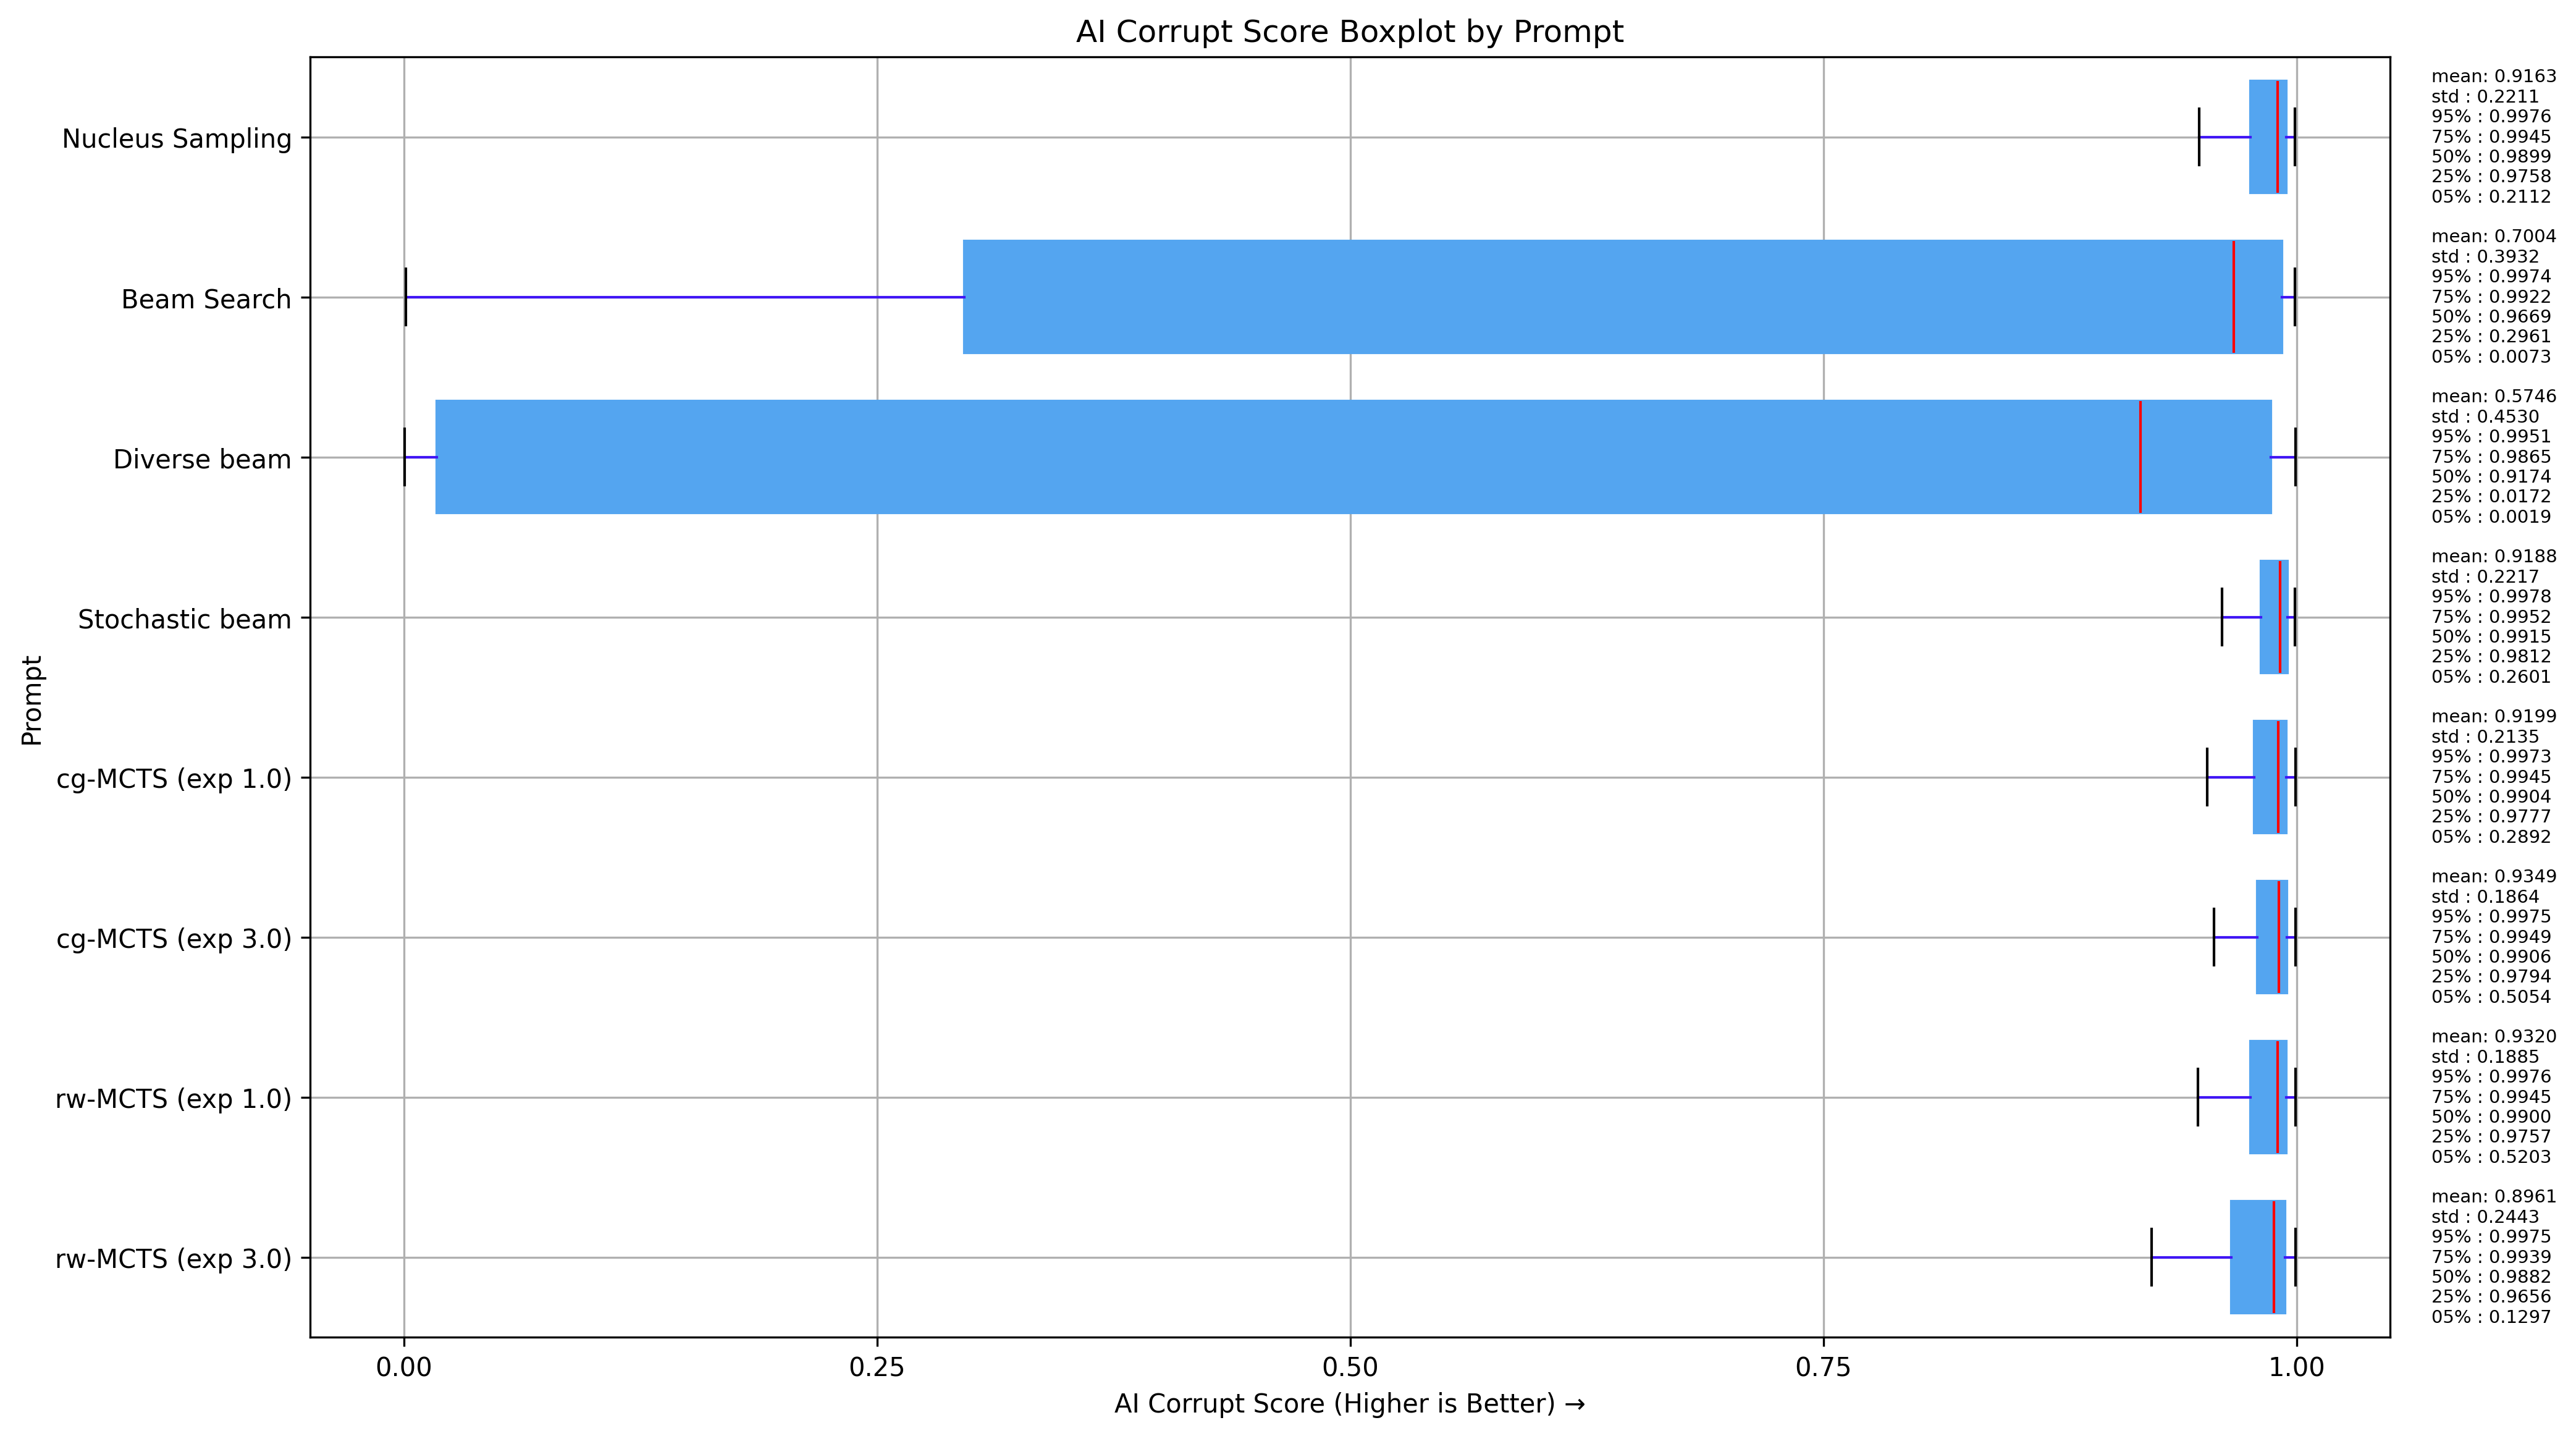


Quantiles for each model:
model                  
rw-MCTS (exp 3.0)  0.05    0.129660
                   0.25    0.965621
                   0.50    0.988235
                   0.75    0.993943
                   0.95    0.997508
rw-MCTS (exp 1.0)  0.05    0.520292
                   0.25    0.975707
                   0.50    0.990033
                   0.75    0.994506
                   0.95    0.997550
cg-MCTS (exp 3.0)  0.05    0.505431
                   0.25    0.979396
                   0.50    0.990595
                   0.75    0.994898
                   0.95    0.997516
cg-MCTS (exp 1.0)  0.05    0.289234
                   0.25    0.977721
                   0.50    0.990439
                   0.75    0.994519
                   0.95    0.997283
Stochastic beam    0.05    0.260074
                   0.25    0.981184
                   0.50    0.991454
                   0.75    0.995153
                   0.95    0.997764
Diverse beam       0.05    0.001857
             

In [60]:
# Calculate statistics for sorting
df_stats = (
    df.groupby("model").agg({"ai_corrupt": ["mean", lambda x: x.mean()]}).reset_index()
)
df_stats.columns = ["model", "mean", "ai_corrupt"]

# Choose sorting method (uncomment the desired method)
# df_stats_sorted = df_stats.sort_values('median', ascending=False)
df_stats_sorted = df_stats.sort_values("mean", ascending=False)

# Sort the original dataframe based on the stats
df_sorted = df.set_index("model").loc[model_order].reset_index()
# print(df_stats)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

df_sorted["model"] = pd.Categorical(
    df_sorted["model"],
    categories=reversed(list(df_sorted["model"].unique())),
    ordered=True,
)
positions = [i * y_scale for i in range(len(model_order))]
# Create the horizontal boxplot using the sorted data
boxplot = df_sorted.boxplot(
    column="ai_corrupt",
    by="model",
    vert=False,
    ax=ax,
    patch_artist=True,
    medianprops={"color": "red"},
    showfliers=False,
    color={
        "boxes": "#54A5F0",
        "whiskers": "#4016F5",
        "medians": "red",
        "caps": "black",
    },
    positions=positions,
    widths=[box_scale] * len(model_order),
)

# Customize the plot
ax.set_title("AI Corrupt Score Boxplot by Prompt")
ax.set_ylabel("Prompt")
ax.set_xlabel("AI Corrupt Score (Higher is Better) →")

# Remove the automatically generated suptitle
plt.suptitle("")

# Adjust the y-axis tick labels
plt.yticks(rotation=0)

# Adjust the data range and tick marks
min_score = df["ai_corrupt"].min()
max_score = df["ai_corrupt"].max()
range_margin = (max_score - min_score) * 0.05
# ax.set_xlim(-1.5, 1.5)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))

# Calculate and add quantile information
quantiles = df_sorted.groupby("model")["ai_corrupt"].quantile(
    [0.05, 0.25, 0.5, 0.75, 0.95]
)
reverse_map = {
    v1: v2
    for v1, v2 in zip(
        df_sorted["model"].unique(), reversed(df_sorted["model"].unique())
    )
}

means = df_sorted.groupby("model")["ai_corrupt"].mean()
std = df_sorted.groupby("model")["ai_corrupt"].std()

# print(quantiles)
for i, model in enumerate(df_sorted["model"].unique()):
    model = reverse_map[model]
    quantile_text = (
        f"mean: {means.loc[model]:.4f}\n"
        f"std : {std.loc[model]:.4f}\n"
        f"95% : {quantiles.loc[model, 0.95]:.4f}\n"
        f"75% : {quantiles.loc[model, 0.75]:.4f}\n"
        f"50% : {quantiles.loc[model, 0.50]:.4f}\n"
        f"25% : {quantiles.loc[model, 0.25]:.4f}\n"
        f"05% : {quantiles.loc[model, 0.05]:.4f}"
    )
    ax.annotate(
        quantile_text,
        xy=(1.02, i * y_scale),
        xycoords=("axes fraction", "data"),
        va="center",
        ha="left",
        fontsize=7,
    )

# Display the plot
plt.tight_layout()
plt.show()

# Log quantile information
print("\nQuantiles for each model:")
print(quantiles)